# sem4python_Week44_Ex10

In [14]:
import numpy as np
import pandas as pd
##Labrador, puddle, rottweiler, bulldog, traveling expenses
p = {
'p1':{'dog_labrador':6,'dog_puddle':5,'dog_rottweiler':3,'dog_bulldog':1, 'traveling_expense':1},
'p2':{'dog_labrador':3,'dog_puddle':6,'dog_rottweiler':2,'dog_bulldog':2, 'traveling_expense':1},
'p3':{'dog_labrador':3,'dog_puddle':4,'dog_rottweiler':3,'dog_bulldog':1, 'traveling_expense':1},
'p4':{'dog_labrador':15,'dog_puddle':4,'dog_rottweiler':3,'dog_bulldog':8, 'traveling_expense':0}
}
##Prices in different countries 
q = {
'Denmark':{'dog_labrador':2500,'dog_puddle':4500,'dog_rottweiler':500,'dog_bulldog':1600, 'traveling_expense':2600},
'UK':{'dog_labrador':1700,'dog_puddle':3000,'dog_rottweiler':450,'dog_bulldog':1700, 'traveling_expense':2700},
'China':{'dog_labrador':700,'dog_puddle':2000,'dog_rottweiler':4500,'dog_bulldog':1200, 'traveling_expense':9000},
'USA':{'dog_labrador':1699,'dog_puddle':1500,'dog_rottweiler':890,'dog_bulldog':1900, 'traveling_expense':5000}
}

shoppersDF = pd.DataFrame(p).T
pricesDF = pd.DataFrame(q)

shoppers = shoppersDF.dot(pricesDF)
print(shoppers) 


    Denmark     UK  China    USA
p1    43200  30950  37900  27264
p2    41300  30100  34500  24677
p3    31200  22850  33800  20667
p4    69800  52450  41600  49355


In [16]:

multi_array = np.array([[1,1,3,10,1]])
newShopperDF = shoppersDF*multi_array
print("New shopper list:\n\n",newShopperDF)

NewShoppersDot = newShopperDF.dot(pricesDF)
print(NewShoppersDot)

New shopper list:

     dog_labrador  dog_puddle  dog_rottweiler  dog_bulldog  traveling_expense
p1             6           5               9           10                  1
p2             3           6               6           20                  1
p3             3           4               9           10                  1
p4            15           4               9           80                  0
    Denmark      UK   China     USA
p1    60600   48950   75700   49704
p2    72100   62500   74100   62437
p3    48600   40850   71600   43107
p4   188000  177550  155000  191495


In [33]:

from tqdm import tqdm
import requests
import os

def download_function(url):
    # read 1024 bytes every time 
    buffer_size = 1024
    # download the body of response by chunk, not immediately
    response = requests.get(url, stream=True)
    # get the total file size
    file_size = int(response.headers.get("Content-Length", 0))
    # get the file name
    filename = url.split("/")[-1]
    fullfilename = os.path.join('data', filename)

    # progress bar, changing the unit to bytes instead of iteration (default by tqdm)
    progress = tqdm(response.iter_content(buffer_size), f"Downloading {filename}", total=file_size, unit="B", unit_scale=True, unit_divisor=1024)
    with open(filename, "wb") as f:
        for data in progress:
            # write data read to the file
            f.write(data)
            # update the progress bar manually
            progress.update(len(data))
    print('File downloaded', filename)

In [36]:
# A + B
GDP_url = "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv"
EU_prod_prices = "https://ec.europa.eu/info/sites/info/files/market-prices-fruit-products_en_6.csv"

download_function(GDP_url)
download_function(EU_prod_prices)

File downloaded NY.GDP.MKTP.CD?downloadformat=csv.csv


File downloaded market-prices-fruit-products_en_6.csv


In [38]:
import csv
import pandas as pd

df = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_1593873.csv', skiprows=4)

year_mask = df.iloc[:,39:-2]
countries = ["Greece", "Spain", "France", "Italy", "Portugal", "European Union"]
countries_data = {}

for country in countries:
    country_mask = (df[:]['Country Name'].str.contains(country) == True)
    data = df[country_mask].iloc[:,39:-2]
    df_new = data.rename(index={data.index[0]: country})
    #countries_data.append(df_new)
    countries_data[country] = df_new
#countries_data

countries_data

{'Greece':                 1995          1996          1997          1998          1999  \
 Greece  1.368784e+11  1.458616e+11  1.431576e+11  1.444282e+11  1.425407e+11   
 
                 2000          2001          2002          2003          2004  \
 Greece  1.301338e+11  1.361914e+11  1.538309e+11  2.019243e+11  2.405213e+11   
 
         ...          2010          2011          2012          2013  \
 Greece  ...  2.993616e+11  2.877978e+11  2.456707e+11  2.398620e+11   
 
                 2014          2015          2016          2017          2018  \
 Greece  2.370296e+11  1.965914e+11  1.952224e+11  2.035884e+11  2.181384e+11   
 
                 2019  
 Greece  2.098528e+11  
 
 [1 rows x 25 columns],
 'Spain':                1995          1996          1997          1998          1999  \
 Spain  6.146090e+11  6.425890e+11  5.900773e+11  6.192148e+11  6.346932e+11   
 
                2000          2001          2002          2003          2004  \
 Spain  5.968776e+11  6.272

In [40]:
import csv
import pandas as pd

df = pd.read_csv('market-prices-fruit-products_en_6.csv', skiprows=0)


county_codes = ["EL", "ES", "FR", "IT", "PT", "EU"]
countries = ["Greece", "Spain", "France", "Italy", "Portugal", "European Union"]
categories = ["Strawberries", "Nectarines", "Apples Braeburn"]
#Food masks
# strawberries_mask = (df[:]['Product desc'].str.contains('Strawberries'))
# nectarines_mask = (df[:]['Product desc'].str.contains('Nectarines'))
# apple_mask = (df[:]['Product desc'].str.contains('Apples Braeburn'))

#Country masks
# greece_mask = (df[:]['Country'].str.contains('EL') == True)
# spain_mask = (df['Country'].str.contains('ES') == True)
# france_mask = (df[:]['Country'].str.contains('FR') == True)
# italy_mask = (df[:]['Country'].str.contains('IT') == True)
# portugal_mask = (df[:]['Country'].str.contains('PT') == True)
# eu_mask = (df[:]['Country'].str.contains('EU') == True)


all_info = {}



for num, country in enumerate(county_codes, start=0):
    country_info = {}
    country_mask = (df[:]['Country'].str.contains(country) == True)
    data = df[country_mask].iloc[:,39:-2]
    for category in categories:
        country_info[category] = df.loc[country_mask & (df[:]['Product desc'].str.contains(category))]
    all_info[countries[num]] = country_info

    

#print((all_info))
#print(countries[0])

,Greece,Spain,France,Italy,Portugal,European Union
1995,136878366230,614609020549,1601094756209,1174662070605,118122007430,8295716693814
1996,145861612825,642588992512,1605675086549,1312426527795,122630089680,8431192714268
1997,143157600024,590077272727,1452884917959,1241879604365,117016535162,7732922104820
1998,144428172835,619214834614,1503108739159,1270052525928,123946327916,7968672602630
1999,142540728958,634693160025,1492647560196,1252023758789,127427343916,7922645428744
2000,130133845771,596877648793,1362248940482,1143829832319,118310710337,7259398860355
2001,136191353467,627286800894,1376465324384,1167012796420,121498889485,7387163472304
2002,153830947016,705394315829,1494286655373,1270712309429,134156091661,8049115975395
2003,201924270316,905492099322,1840480812641,1574145823927,164862142212,9911359749306
2004,240521260988,1067093369754,2115742488204,1803226967966,189034502110,11398794129126


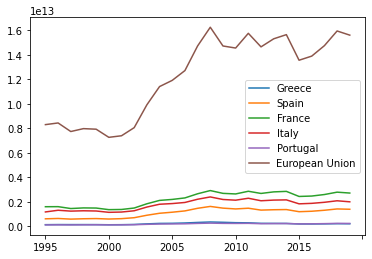

In [41]:
import pandas as pd
import numpy as np

type(countries_data)
countries = ["Greece", "Spain", "France", "Italy", "Portugal", "European Union"]

gdp_greece = pd.DataFrame (countries_data["Greece"]).T
gdp_greece = pd.DataFrame (gdp_greece['Greece'].apply(np.int64))

gdp_spain = pd.DataFrame (countries_data['Spain']).T
gdp_spain = pd.DataFrame (gdp_spain['Spain'].apply(np.int64))

gdp_france = pd.DataFrame (countries_data['France']).T
gdp_france = pd.DataFrame (gdp_france['France'].apply(np.int64))

gdp_italy = pd.DataFrame (countries_data['Italy']).T
gdp_italy = pd.DataFrame (gdp_italy['Italy'].apply(np.int64))

gdp_portugal = pd.DataFrame (countries_data['Portugal']).T
gdp_portugal = pd.DataFrame (gdp_portugal['Portugal'].apply(np.int64))

gdp_eu = pd.DataFrame (countries_data['European Union']).T
gdp_eu = pd.DataFrame (gdp_eu['European Union'].apply(np.int64))


gdp = [gdp_greece, gdp_spain, gdp_france, gdp_italy, gdp_portugal, gdp_eu]

#all_info

result = pd.concat(gdp, axis=1)
#result
result.plot()
result

In [42]:
# B Getting data out with data we want
import datetime

start_year = 1995
end_year = 2021
difference = end_year - start_year 

countries = ["Greece", "Spain", "France", "Italy", "Portugal", "European Union"]
categories = ["Strawberries", "Nectarines", "Apples Braeburn"]

all_food_data = {}


for num, country in enumerate(countries, start=0):
    country_info = {}
    country_mask = all_info.get(country)
    all_food_data[country] = {}
    for category in categories:
        cat_country = pd.DataFrame(country_mask[category])
        all_food_data[country][category] = []
        if (len(cat_country) != 0):
            for years in range(difference):
                get_start = int(str(start_year+years)+"01")
                get_end = int(str(start_year+years)+"12")
                year_mask = cat_country[((cat_country[:]['Period']) >= get_start) & ((cat_country[:]['Period']) <= get_end)]
                sum = year_mask.iloc[:]["MP Market Price"].sum()
                mean = sum / 12
                if (sum != 0):
                    all_food_data[countries[num]][category].append({"year": start_year+years, country+" "+category+" avg. cost": mean})

all_food_data

{'Greece': {'Strawberries': [],
  'Nectarines': [{'year': 2005,
    'Greece Nectarines avg. cost': 17.188883333333333},
   {'year': 2007, 'Greece Nectarines avg. cost': 21.944441666666666},
   {'year': 2008, 'Greece Nectarines avg. cost': 25.6875},
   {'year': 2011, 'Greece Nectarines avg. cost': 18.930558333333334},
   {'year': 2012, 'Greece Nectarines avg. cost': 36.872225},
   {'year': 2013, 'Greece Nectarines avg. cost': 51.95208333333333},
   {'year': 2014, 'Greece Nectarines avg. cost': 54.297225},
   {'year': 2015, 'Greece Nectarines avg. cost': 48.668058333333335},
   {'year': 2016, 'Greece Nectarines avg. cost': 45.665975},
   {'year': 2017, 'Greece Nectarines avg. cost': 44.1865},
   {'year': 2018, 'Greece Nectarines avg. cost': 48.51266666666667},
   {'year': 2019, 'Greece Nectarines avg. cost': 36.989916666666666},
   {'year': 2020, 'Greece Nectarines avg. cost': 10.0875}],
  'Apples Braeburn': []},
 'Spain': {'Strawberries': [{'year': 1997,
    'Spain Strawberries avg. cos

In [43]:
# B Removing empty arrays

import matplotlib.pyplot as plt
import pandas as pd

countries = ["Greece", "Spain", "France", "Italy", "Portugal", "European Union"]
categories = ["Strawberries", "Nectarines", "Apples Braeburn"]



list_df = {}
for num, country in enumerate(countries, start=0):
    list_df[country] = {}
    data = all_food_data.get(country)
    for category in categories:
        #list_df[country][category] = []
        if(data.get(category) is not None):
            if(len(data.get(category)) == 0):
                data.pop(category)
            else:
                list_df[country][category] = []
                list_df[country][category] = data.get(category)

list_df

{'Greece': {'Nectarines': [{'year': 2005,
    'Greece Nectarines avg. cost': 17.188883333333333},
   {'year': 2007, 'Greece Nectarines avg. cost': 21.944441666666666},
   {'year': 2008, 'Greece Nectarines avg. cost': 25.6875},
   {'year': 2011, 'Greece Nectarines avg. cost': 18.930558333333334},
   {'year': 2012, 'Greece Nectarines avg. cost': 36.872225},
   {'year': 2013, 'Greece Nectarines avg. cost': 51.95208333333333},
   {'year': 2014, 'Greece Nectarines avg. cost': 54.297225},
   {'year': 2015, 'Greece Nectarines avg. cost': 48.668058333333335},
   {'year': 2016, 'Greece Nectarines avg. cost': 45.665975},
   {'year': 2017, 'Greece Nectarines avg. cost': 44.1865},
   {'year': 2018, 'Greece Nectarines avg. cost': 48.51266666666667},
   {'year': 2019, 'Greece Nectarines avg. cost': 36.989916666666666},
   {'year': 2020, 'Greece Nectarines avg. cost': 10.0875}]},
 'Spain': {'Strawberries': [{'year': 1997,
    'Spain Strawberries avg. cost': 49.29405833333333},
   {'year': 1998, 'Spai

In [44]:
# print(test2)
# print(test2.pop("Strawberries"))
# print(test2)
# print(test2.pop("Apples Braeburn"))
# print(test2)
#len(test2.get('Apples Braeburn'))
pd.DataFrame(list_df)
Greece = list_df.get("Greece")
Nec = Greece.get("Nectarines")
Greece = list_df.get("Spain")
Nec2 = Greece.get("Nectarines")
g_nc_df = pd.DataFrame(Nec).set_index('year')
g_nc_df2 = pd.DataFrame(Nec2).set_index('year')

##Greece
Greece = list_df.get("Greece")
Nec = Greece.get("Nectarines")
##Spain
Spain = list_df.get("Spain")

##France

##Italy

##Portugal

##EU

countries = ["Greece", "Spain", "France", "Italy", "Portugal", "European Union"]
categories = ["Strawberries", "Nectarines", "Apples Braeburn"]

country_food_prices = []

def make_df():
    for country in countries:
        country = list_df.get(country)
        for category in categories:
            if(country.get(category) is not None):
                c_food_df = pd.DataFrame(country.get(category)).set_index('year')
                #c_food_df = country.get(category)
                #country_food_prices[category] = []
                #country_food_prices[category] = c_food_df
                country_food_prices.append(c_food_df)
                #country_food_prices = country_food_prices[category]

make_df()

# pd.DataFrame(test)
# test = [g_nc_df,g_nc_df2]
# result = pd.concat(test, axis=1)
# result

country_food_prices
result = pd.concat(country_food_prices, axis=1)
result

,Greece Nectarines avg. cost,Spain Strawberries avg. cost,Spain Nectarines avg. cost,France Strawberries avg. cost,France Nectarines avg. cost,France Apples Braeburn avg. cost,Italy Strawberries avg. cost,Italy Nectarines avg. cost,Italy Apples Braeburn avg. cost,Portugal Strawberries avg. cost,Portugal Nectarines avg. cost,European Union Strawberries avg. cost,European Union Nectarines avg. cost,European Union Apples Braeburn avg. cost
year,,,,,,,,,,,,,,
1997,NaN,49.294058,NaN,NaN,NaN,NaN,8.865583,NaN,NaN,NaN,NaN,116.319283,NaN,NaN
1998,NaN,113.293308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.586617,NaN,NaN
1999,NaN,177.454725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.556867,NaN,362.991500,NaN,NaN
2000,NaN,154.776942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.458300,11.373433,463.479567,22.746867,NaN
2001,NaN,153.826933,28.365300,NaN,NaN,NaN,NaN,NaN,NaN,131.670517,NaN,484.912400,56.730600,NaN
2002,NaN,116.937083,25.522758,NaN,NaN,NaN,28.964283,26.760533,NaN,98.465275,NaN,678.681883,52.283300,NaN
2003,NaN,123.482092,47.841275,NaN,NaN,NaN,33.913400,29.272500,NaN,132.965275,NaN,545.936133,96.335033,NaN
2004,NaN,59.490558,46.788700,NaN,NaN,NaN,31.585900,19.127508,17.000000,86.250000,NaN,359.295817,83.166450,110.755517
2005,17.188883,49.936950,23.489817,NaN,NaN,NaN,93.157692,25.002292,48.754950,168.625000,NaN,403.373842,53.400950,122.841933
